# Assignment 02

### Deadline: February 27th 2025, 10:00 AM

### Deliverables:
Please submit, via Canvas, a **zip file** including the following:
- a .ipynb file (you can use this one) with all of your code included -- `02_assignment_surname1_surname2.ipynb`
- a compiled .html file of your .ipynb which includes all of the output -- `02_assignment_surname1_surname2.html`
- a pdf file with your written answers to the questions -- `02_assignment_surname1_surname2.pdf`

Make sure to follow the naming convention indicated above. The zip name can be named `02_assignment_surname1_surname2`.

Make sure to annotate your code. We may substract points if code is not annotated and unclear.

---

## Data

We are using the [Statlog (German Credit Data)](http://archive.ics.uci.edu) dataset. The German Credit dataset classifies people described by a set of 20 features as good or bad credit risk.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [2]:
# complete dataset
loan_data = pd.read_csv('../datasets/credit/credit-g_csv.csv')

# train_data 
# X_train = pd.read_csv('../datasets/credit/credit_X_train.csv')
X_train = pd.read_csv('../datasets/credit/encoded_credit_X_train.csv')
y_train = pd.read_csv('../datasets/credit/credit_y_train.csv')

# test data
# X_test = pd.read_csv('../datasets/credit/credit_X_test.csv')
X_test = pd.read_csv('../datasets/credit/encoded_credit_X_test.csv')
y_test = pd.read_csv('../datasets/credit/credit_y_test.csv')

--- 
# PART I: Tabular data

---
## 1. Training a black-box model

(5 points)

**1.1** Shortly explain what a multi-layer perceptron is.

**1.2** Use the package `scikit-learn` to train a multi-layer perceptron. The model should have 3 layers: input layer (size equal to the nr of features), 1 hidden layer with 50 units, and an output layer of size 1. Make sure that it is reproducible.

---
## 2. LIME - Tabular

(15 points)

**2.1** Explain the idea of LIME in your own words. 

**2.2** What could be a problem when using one-hot encoded features?

**2.3** Apply LIME to a sample from the test set. The explanation should include 10 features. Explain the output.

**2.4** Explain how LIME works for images in your own words.

---
## 3. SHAP - Tabular

(10 points)

**3.1** Explain the process of KernelSHAP in your own words. 

**3.2** Apply _KernelSHAP_ to your trained neural network. Only use 100 samples of the train data to create the SHAP explainer, as it may be too computationally heavy and take too long. You can do this using `shap.sample(X_train,100)` as parameter inside the function call. Then, compute the SHAP values for all samples in the test set.

**3.3** Inspect the local explanation for the same sample you chose in Q2.3 and interpret the explanation. Use a waterfall plot for that.


**3.4** Take a look at the summary plot as global explanation for the model. Provide a description and interpreation of the global explanation.

---
# PART II: Image data

In the following we would like you to apply both LIME and SHAP to image data. Below, we have prepared some code that you should use. There are blanks in the code that you need to fill in.

For this part we are using a pre-trained model that we can load from `pytorch`. We have provided you the code for that. The model was trained on the ImageNet dataset, which is one of the most popular datasets in computer vision and machine learning. The dataset contains millions of labeled images across thousands of object categories and is often used as benchmark for testing and developing models for object recognition. The model we're using, called VGG16, is a deep neural network with 13 convolutional layers, 5 max-pooling layers, and 3 fully connected layers. 

We want to explain the prediction for two images. For each image, we are interested in the model predictions for the top 5 classes. The code for this is already given. 

We want to generate explanations using LIME and SHAP for both images, for each of the top 5 classes. This is your task. See below for specific instructions.

## 4. LIME - Images

(10 points)

**4.1** Complete the code to generate LIME explanations for the two images at index 26 and 41. Consider these requirements for the code/output: 

Create a 2x6 grid to plot the images and explanations. The following should be the case for the output:
- the first image in each row shows the original image
- the other five images show the explanations for the top 5 classes (from left to right)
- the title of each image should be the class for which the explanation is for

<img src="Lime-expl-scheme.png" alt="drawing" width="700"/>

Read the documentation for LIME for images here: https://lime-ml.readthedocs.io/en/latest/lime.html#module-lime.lime_image 

For the LIME explanation, specify the following parameters:
- the image (each of the two images to explain)
- the classifier function to predict the outcome. You can use `lime_pred()` for that.
- use 100 samples to generate the explanation
- `hide_color = 0`
- get the explanations for the top 5 classes

**4.2** Interpret the output given by LIME for both images.


## 5. SHAP - Images

(5 points)

**5.1** Complete the code to generate SHAP explanations for the two images at index 26 and 41. **For this, follow [this example / online tutorial](https://shap.readthedocs.io/en/latest/example_notebooks/image_examples/image_classification/Explain%20an%20Intermediate%20Layer%20of%20VGG16%20on%20ImageNet%20%28PyTorch%29.html)!.** Note that for this question we will use `shap.GradientExplainer()` instead of `shap.DeepExplainer()` like we did in class.

You can find the documentation here: https://shap.readthedocs.io/en/latest/generated/shap.GradientExplainer.html#shap.GradientExplainer

_Note: SHAP will take really long to run. Use `nsamples = 100` and get explanations for the top 5 classes. If that takes too long, only look at the top 2 classes and/or reduce the number of samples. Please report the decisions and steps you take in your file._

**5.2** Interpret the output given by SHAP for both images.

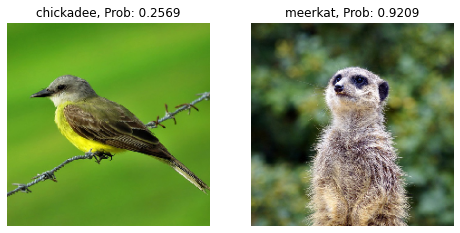

In [6]:
## ****************************************************************************
##                             do not change this code
## ****************************************************************************

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.models as models
from lime import lime_image
import shap
import json

## ----------------------------------------------------------------------------
##                             helper functions
## ----------------------------------------------------------------------------
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

def normalize(image):
    if image.max() > 1:
        image /= 255
    image = (image - mean) / std
    # in addition, roll the axis so that they suit pytorch
    return torch.tensor(image.swapaxes(-1, 1).swapaxes(2, 3)).float()

def lime_pred(img):
    model.eval()
    img = torch.tensor(img).permute(0,3,1,2)
    output = model(img.float())
    return output.detach().numpy()

## ----------------------------------------------------------------------------
##                             load the model
## ----------------------------------------------------------------------------
model = models.vgg16(weights='VGG16_Weights.IMAGENET1K_V1')
model.eval()

# load the ImageNet class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)
    
# load some example data
X, y = shap.datasets.imagenet50()
X /= 255

## ----------------------------------------------------------------------------
##                             inspect images to explain
## ----------------------------------------------------------------------------

to_explain = X[[26,41]]

# get predictions for images to explain
num_classes = 5
output = model(normalize(to_explain))
probabilities = torch.nn.functional.softmax(output, dim=1)
top_prob, top_idx = torch.topk(probabilities, num_classes)

# plot images
f, axes = plt.subplots(1,2,figsize=(8, 5))
for i in range(len(to_explain)):
    axes[i].imshow(to_explain[i])
    axes[i].set_title(f'{class_names[str(top_idx[i][0].item())][1]}, Prob: {round(top_prob[i][0].item(),4)}')
    axes[i].axis('off')

In [ ]:
## ****************************************************************************
##                           adjust code here for Q 4.1
## ****************************************************************************

## ----------------------------------------------------------------------------
##                            LIME explanations
## ----------------------------------------------------------------------------

# initialize the explainer instance
explainer = ...

# create figure environment to display explanations
fig, axes = plt.subplots(2, num_classes+1, figsize=(15, 5))

# -------
# loop through the images to explain
# -------
for i, img in enumerate(to_explain): 
    
    # display the original image in the figure grid
    ...
    
    # -------
    # derive an explanation for each of the images
    # -------
    img = torch.tensor(img).double().numpy() # adjust type and format of img
    
    explanation = ...

    # -------
    # loop through the top 5 classes and display the explanation
    # -------
    for c in range(num_classes):
        # get LIME explanation
        temp, mask = explanation.get_image_and_mask(explanation.top_labels[c], positive_only=True, 
                                                    num_features=5, hide_rest=True)
        
        # display the five explanations in the figure grid
        ...

# -------
# specify main title and show final figure        
# -------
fig.suptitle('LIME Explanations')
plt.show()

In [ ]:
## ****************************************************************************
##                           adjust code here for Q 5.1
## ****************************************************************************

## ----------------------------------------------------------------------------
##                            SHAP explanations
## ----------------------------------------------------------------------------

# -------
# initialize the explanation instance
# -------
e = ...

# -------
# generate explanations
# -------
shap_values, indexes = ...

# the latest version of shap provides shap_values in a numpy array, however we need
# them to be in a list for the code as shown in the shap example linked above to work
if isinstance(shap_values, np.ndarray):
    print('shap_values is a numpy array and will be transformed to a list.')
    shap_values = [shap_values[..., i] for i in range(shap_values.shape[-1])]


# -------
# get the class names and plot explanations
# -------
# get the names for the classes
index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

# rotate shap values
shap_values = [np.swapaxes(np.swapaxes(s, 2, 3), 1, -1) for s in shap_values]

# plot explanations
...

---
# PART III: Discussion

## 6. Discussion

(10 points)

**6.1** Look at assignment 01 and the models you have trained there. Compare the model performance of the glassbox models to the neural network you have trained in this assignment. What do you observe and how can you explain it?

**6.2** Name and explain two different criticisms of feature importance methods.

**6.3** Compare the output provided by LIME and SHAP for images using the two images from PART II as example.